In [23]:
import pandas as pd
import numpy as np
import lifelines
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### log rank test <between two groups>
### If on continous variable then use regression
### h0 = survival rate is equal

In [58]:
datafile = "HR_dataset.csv"
data = pd.read_csv(datafile)

In [59]:
columns = ["YearsAtCompany","Attrition"]

In [63]:
# Prepare unique durations in ascending order
df = data
durations = df.sort_values('YearsAtCompany')['YearsAtCompany'].unique()
columns = ['duration', 'n_at_risk', 'n_events', 
           'survival_probability']
km = pd.DataFrame(columns=columns, dtype=np.number)
km = km.append(pd.DataFrame([[0, df.shape[0], 0, 1]], 
                            columns=columns))
# Calculate survival probability for each duration
data = data[["YearsAtCompany","Attrition"]]
for i, t in enumerate(durations):
    n = np.sum(df['YearsAtCompany']>=t)
    d = np.sum((df['YearsAtCompany']==t) & (df['Attrition']=="Yes"))
    s = (1 - d / n) * km.loc[i, 'survival_probability']
    km = km.append(pd.DataFrame([[t, n, d, s]], 
                                index=[i+1],
                                columns=columns))
km

<ipython-input-63-48054abb7bb6>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  km = km.append(pd.DataFrame([[0, df.shape[0], 0, 1]],
<ipython-input-63-48054abb7bb6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  km = km.append(pd.DataFrame([[t, n, d, s]],
<ipython-input-63-48054abb7bb6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  km = km.append(pd.DataFrame([[t, n, d, s]],
<ipython-input-63-48054abb7bb6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  km = km.append(pd.DataFrame([[t, n, d, s]],
<ipython-input-63-48054abb7bb6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

,duration,n_at_risk,n_events,survival_probability
0,0.0,1470.0,0.0,1.000000
1,0.0,1470.0,16.0,0.989116
2,1.0,1426.0,59.0,0.948192
3,2.0,1255.0,27.0,0.927792
4,3.0,1128.0,20.0,0.911342
5,4.0,1000.0,19.0,0.894026
6,5.0,890.0,21.0,0.872931
7,6.0,694.0,9.0,0.861611
8,7.0,618.0,11.0,0.846275
9,8.0,528.0,9.0,0.831850


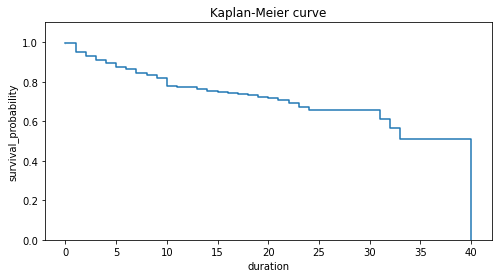

In [67]:
plt.figure(figsize=(8,4))
sns.lineplot(data=km, x='duration', y='survival_probability', 
             drawstyle='steps-post')
plt.ylim(0,1.1) 
plt.title("Kaplan-Meier curve");

In [69]:
np.sum((df['YearsAtCompany']==0) & (df['Attrition']=="Yes"))

16

In [70]:
km

,duration,n_at_risk,n_events,survival_probability
0,0.0,1470.0,0.0,1.000000
1,0.0,1470.0,16.0,0.989116
2,1.0,1426.0,59.0,0.948192
3,2.0,1255.0,27.0,0.927792
4,3.0,1128.0,20.0,0.911342
5,4.0,1000.0,19.0,0.894026
6,5.0,890.0,21.0,0.872931
7,6.0,694.0,9.0,0.861611
8,7.0,618.0,11.0,0.846275
9,8.0,528.0,9.0,0.831850
